## 6. Write a program to implement simple linear regression and multiple linear regression

### Simple linear regression from scratch

Slope: 9449.962321455076
Intercept: 25792.200198668696
R^2: 0.9569566641435086


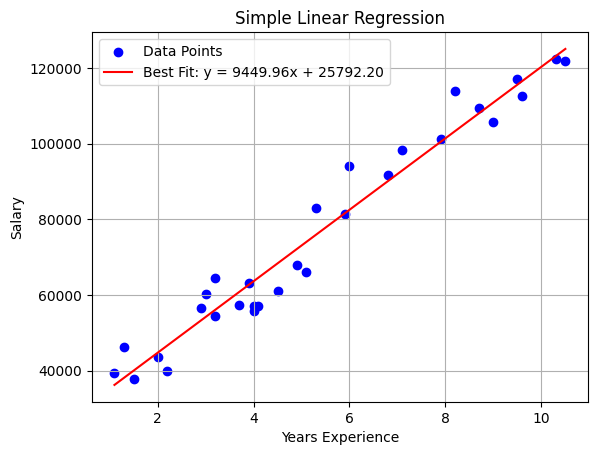

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data/Dataset/logistic_Salary_Data.csv")
x = data["YearsExperience"]
y = data["Salary"]
n = len(x)

xMean = sum(x) / n
yMean = sum(y) / n

dx = x - xMean
dy = y - yMean

d = dx * dy
dx2 = dx * dx
dy2 = dy * dy

slope = sum(d) / sum(dx2)
intercept = yMean - slope * xMean

yp = slope * x + intercept

r2 = 1 - (sum((y - yp) ** 2) / sum(dy2))

plt.scatter(x, y, c='b')
plt.plot(x, yp, c='r')

print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R^2: {r2}')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.legend(['Data Points', f'Best Fit: y = {slope:.2f}x + {intercept:.2f}'])
plt.title('Simple Linear Regression')
plt.grid(True)
plt.show()

### Simple linear regression using library

Slope: 9449.962321455074
Intercept: 25792.20019866871


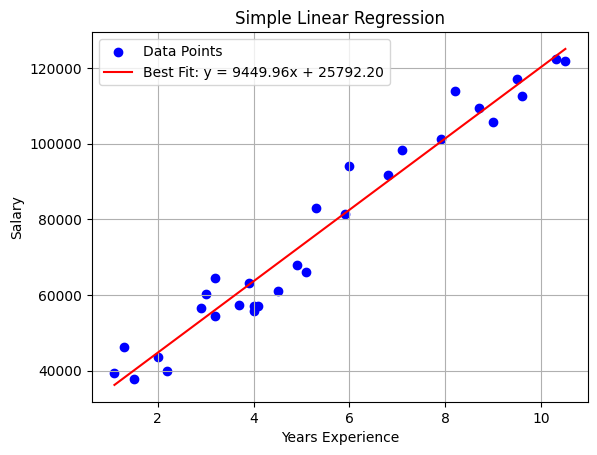

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv("data/Dataset/logistic_Salary_Data.csv")
x = data[["YearsExperience"]]
y = data["Salary"]

model = LinearRegression()
model.fit(x, y)

yp = model.predict(x)

slope = model.coef_[0]
intercept = model.intercept_

plt.scatter(x, y, c='b')
plt.plot(x, yp, c='r')
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.legend(['Data Points', f'Best Fit: y = {slope:.2f}x + {intercept:.2f}'])
plt.title('Simple Linear Regression')
plt.grid(True)
plt.show()

### Multiple linear regression from scratch

Intercept: 377.29114647366896
Coefficients: [-3.47901492e+01 -6.65887518e-02 -2.42588889e-03  1.33644936e+03]



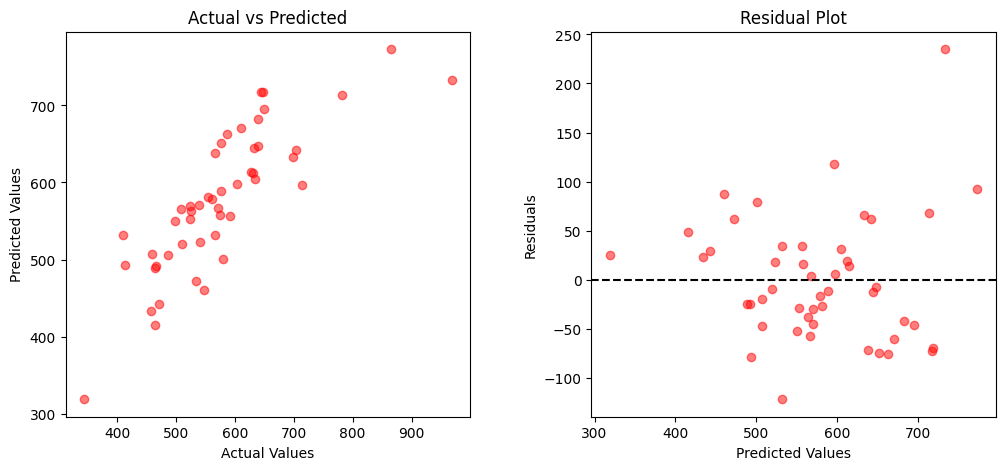

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("data/Dataset/petrol_consumption.csv")

x = data.iloc[:, :-1].to_numpy()
y = data.iloc[:, -1:].to_numpy()
x = np.hstack((np.ones((x.shape[0], 1)), x))

x_t = x.T
beta = np.linalg.inv(x_t @ x) @ x_t @ y


intercept = beta[0][0]
coefficients = beta[1:].flatten()

yp = x @ beta

print("Intercept:", intercept)
print("Coefficients:", coefficients)
print()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y, yp, c='r', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")

plt.subplot(1, 2, 2)
residuals = y - yp
plt.scatter(yp, residuals, c='r', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

plt.subplots_adjust(wspace=0.3)
plt.show()

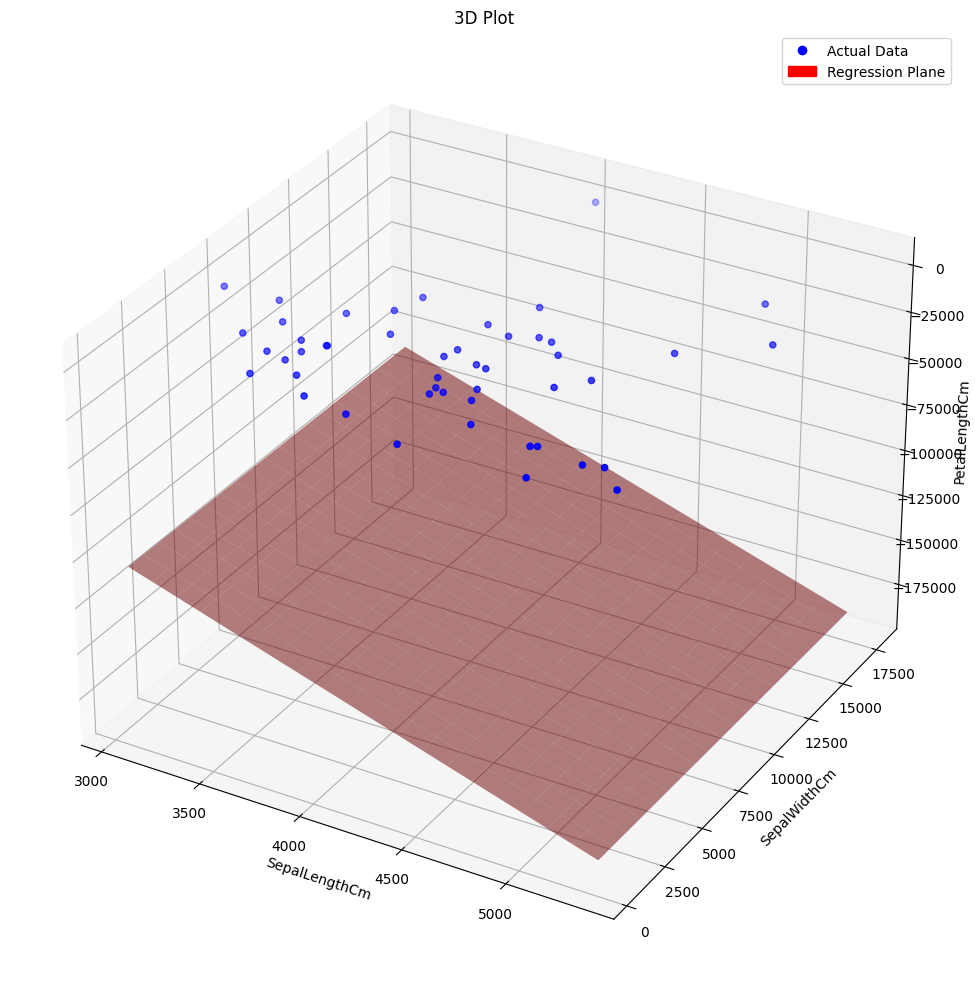

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

scatter_plot = ax.scatter(x[:, 0], x[:, 1], y.flatten(), color='blue')

x1_range = np.linspace(x[:, 0].min(), x[:, 0].max(), 20)
x2_range = np.linspace(x[:, 1].min(), x[:, 1].max(), 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
y_grid = intercept + coefficients[0] * x1_grid + coefficients[1] * x2_grid

surface_plot = ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5, color='red')

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_title("3D Plot")

custom_lines = [
    Line2D([0], [0], marker='o', color='w', label='Actual Data', markerfacecolor='blue', markersize=8),
    Patch(facecolor='red', edgecolor='r', label='Regression Plane')
]
ax.legend(handles=custom_lines)
plt.tight_layout()
plt.show()

### Multiple linear regression using library

Intercept: 377.29114647367646
Coefficients: [-3.47901492e+01 -6.65887518e-02 -2.42588889e-03  1.33644936e+03]



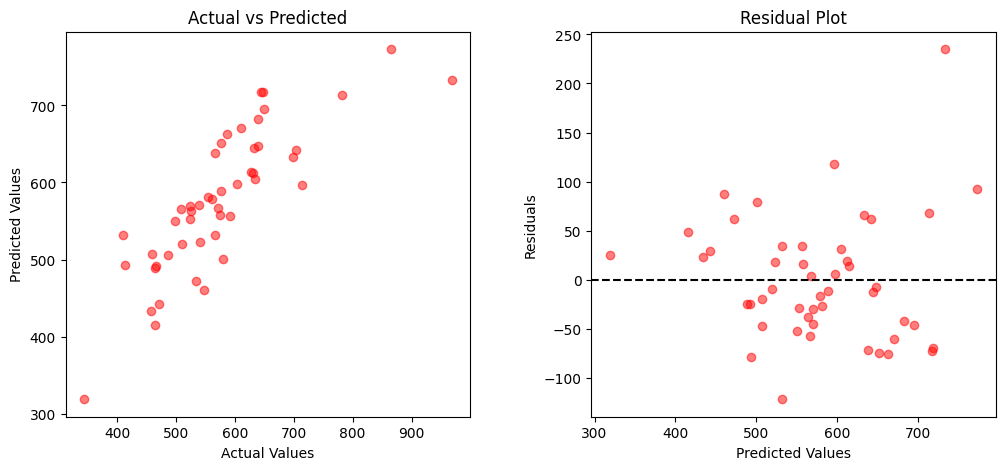

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv("data/Dataset/petrol_consumption.csv")
x = data[data.columns[:-1]]
y = data[data.columns[-1]]

model = LinearRegression()
model.fit(x, y)

yp = model.predict(x)

coefficients = model.coef_
intercept = model.intercept_
print("Intercept:", intercept)
print("Coefficients:", coefficients)
print()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y, yp, c='r', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")

plt.subplot(1, 2, 2)
residuals = y - yp
plt.scatter(yp, residuals, c='r', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

plt.subplots_adjust(wspace=0.3)
plt.show()